**ENTREGA FINAL**

***Grupo 8*** - Karen Baz, Federico Novelli

*Importacion de librerias necesarias para este proyecto*

In [357]:
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import scipy as stast
import seaborn as sns
import sklearn as skl 
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn import metrics        
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import mglearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [358]:
import warnings
warnings.filterwarnings('ignore')

*Importacion de dataset*

In [359]:
rawDataSet = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [360]:
rawDataSet.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


_______________________________________________________________________
_______________________________________________________________________

**PARTE 1: EXPLORATORY DATA ANALYSIS**

In [361]:
rawDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [362]:
print(rawDataSet.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


*No tenemos valores faltantes por lo que no es necesario hacer un Data Cleaning*

In [363]:
100*rawDataSet['DEATH_EVENT'].value_counts()/len(rawDataSet['DEATH_EVENT'])

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

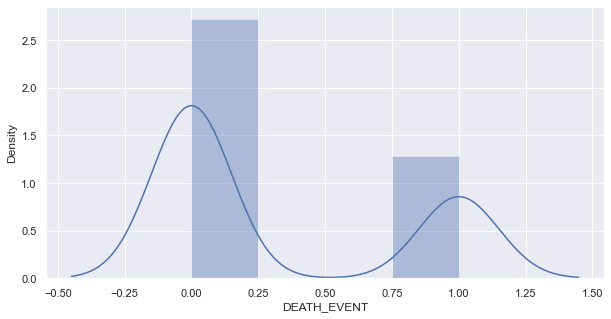

In [364]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(rawDataSet.iloc[:, -1]);

*A partir del último calculo podemos ver que estamos frente a un set de datos altamente desbalanceado. Tenemos mas de dos tercios de personas que no han muerto.*

In [365]:
rawDataSet.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


*Como voy a empezar a modificar el set de datos, creo una copia así no pierdo la información original.*

In [366]:
dataSet = rawDataSet.copy()
dataSet.rename(columns = {'time' : 'Tiempo_de_obs', 'age' : 'Edad', 'sex' : 'Sexo', 'smoking' : 'Fumar', 'diabetes' : 'Diabetes', 'high_blood_pressure' : 'Hipertension', 'serum_sodium' : 'Sodio', 'anaemia' : 'Anemia', 'creatinine_phosphokinase' : 'Creatinina_Fosfoquinasa', 'ejection_fraction' : 'Fraccion_de_Ejeccion', 'platelets' : 'Plaquetas', 'serum_creatinine' : 'Creatinina', 'DEATH_EVENT' : 'Muerte'}, inplace = True)
dataSet = dataSet[['Tiempo_de_obs', 'Edad', 'Sexo', 'Fumar', 'Diabetes', 'Hipertension', 'Sodio', 'Anemia', 'Creatinina_Fosfoquinasa', 'Fraccion_de_Ejeccion', 'Plaquetas', 'Creatinina', 'Muerte']]
dataSet.head()

,Tiempo_de_obs,Edad,Sexo,Fumar,Diabetes,Hipertension,Sodio,Anemia,Creatinina_Fosfoquinasa,Fraccion_de_Ejeccion,Plaquetas,Creatinina,Muerte
0,4,75.0,1,0,0,1,130,0,582,20,265000.00,1.9,1
1,6,55.0,1,0,0,0,136,0,7861,38,263358.03,1.1,1
2,7,65.0,1,1,0,0,129,0,146,20,162000.00,1.3,1
3,7,50.0,1,0,0,0,137,1,111,20,210000.00,1.9,1
4,8,65.0,0,0,1,0,116,1,160,20,327000.00,2.7,1


*Hay participantes que fueron observados por 4 días. Es un tiempo muy reducido como para poder tener una evaluación consistente.*

*Consideramos que en menos de 3 meses, no se puede obtener información que pueda ser útil para tener observaciones generalizadas. Es por esto que descartamos aquellas instancias que cuentan con tiempo de observación menor a 60 días.*

In [367]:
#dataSet.drop(dataSet[dataSet.time < 60].index, inplace=True)
#dataSet.describe()

In [368]:
100*dataSet['Muerte'].value_counts()/len(dataSet['Muerte'])

0    67.892977
1    32.107023
Name: Muerte, dtype: float64

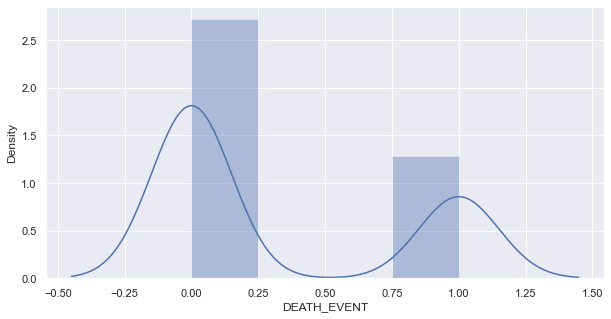

In [369]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(rawDataSet.iloc[:, -1]);

*Vemos que ahora quedó aún más desbalanceado el set de datos*

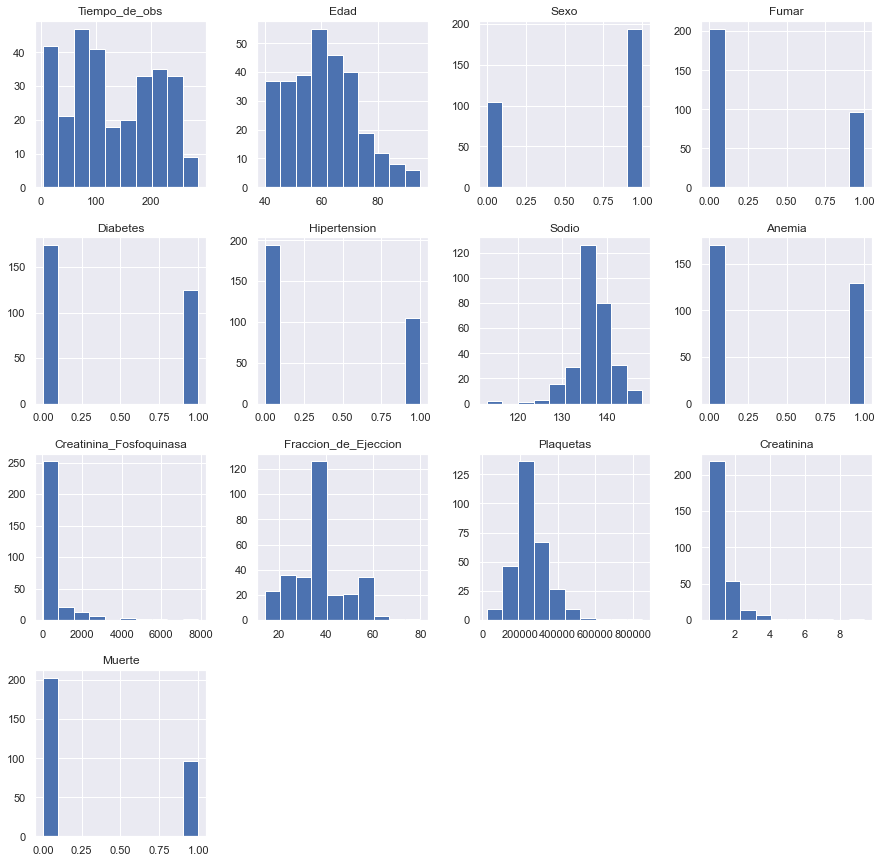

In [370]:
dataSet.hist(figsize = (15,15));

In [371]:
bins = []
for i in range(12):
    bins.append(40 + (i)*40/8)
print(bins)

[40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0]


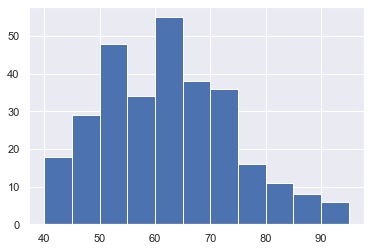

In [372]:
plt.hist(dataSet['Edad'], bins);
plt.show;

*Analisis del data set segun su resultado final*

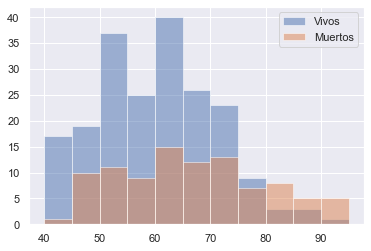

In [373]:
# separamos el dataset en dos segun si muere o no
deathDataSet = dataSet[dataSet['Muerte'] == 1]
aliveDataSet = dataSet[dataSet['Muerte'] == 0]
plt.hist(aliveDataSet['Edad'], bins, alpha = 0.5, label = 'Vivos')
plt.hist(deathDataSet['Edad'], bins, alpha = 0.5, label = 'Muertos')
plt.legend(loc = 'upper right')
plt.show()

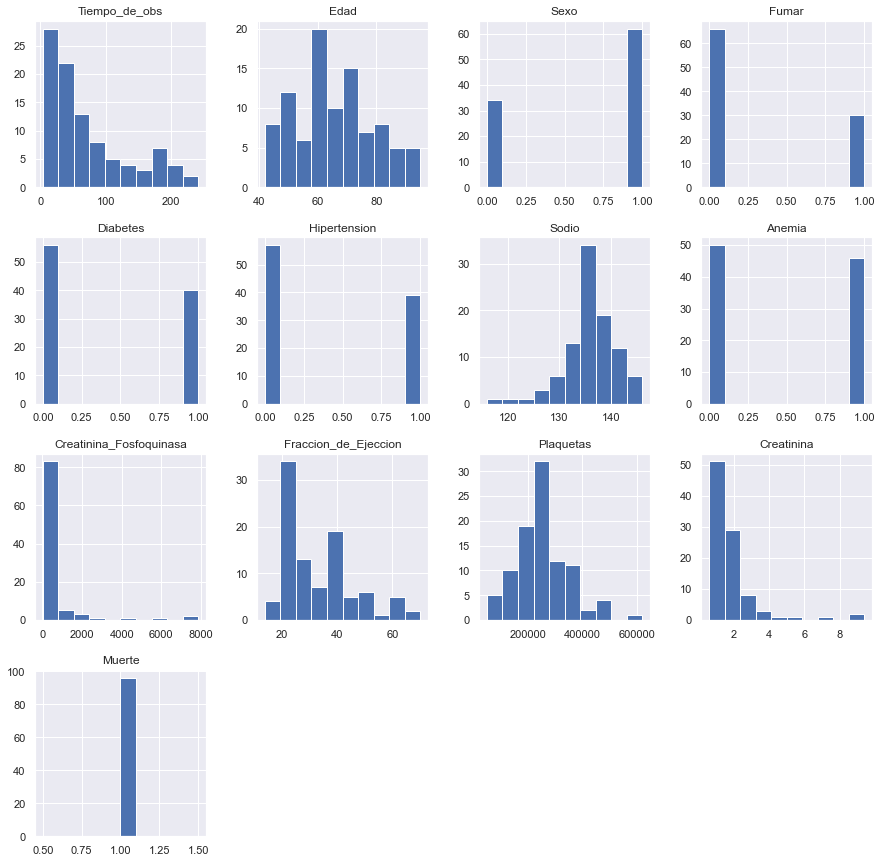

In [374]:
deathDataSet.hist(figsize = (15,15));

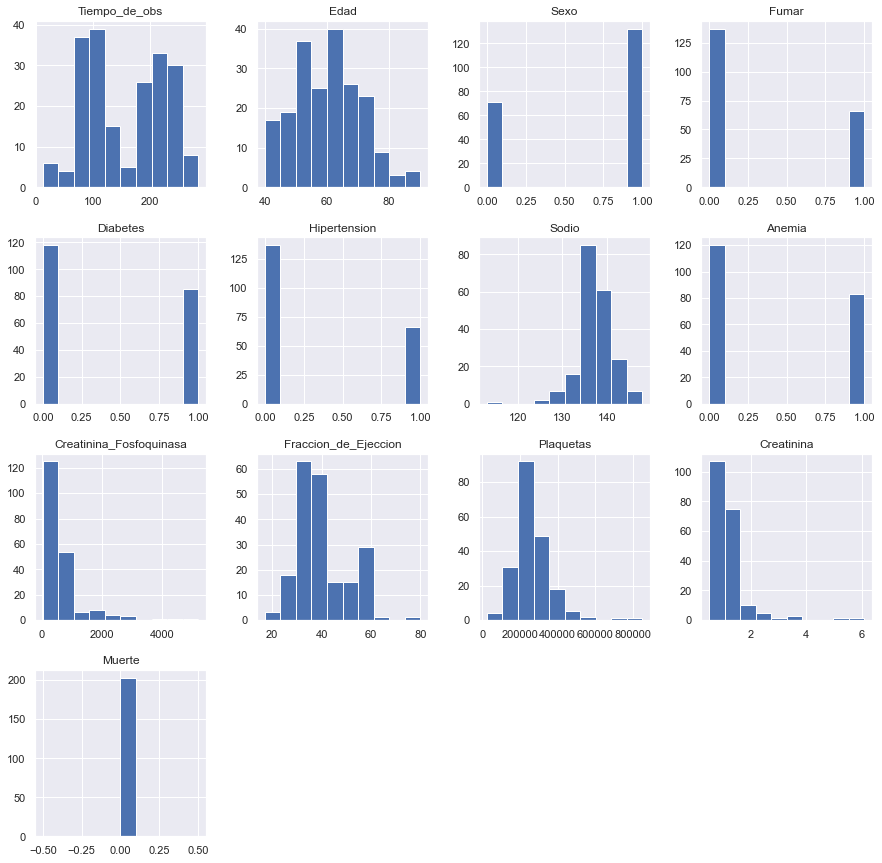

In [375]:
aliveDataSet.hist(figsize = (15,15));

In [376]:
deathDataSet.describe()

,Tiempo_de_obs,Edad,Sexo,Fumar,Diabetes,Hipertension,Sodio,Anemia,Creatinina_Fosfoquinasa,Fraccion_de_Ejeccion,Plaquetas,Creatinina,Muerte
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,70.885417,65.215281,0.645833,0.312500,0.416667,0.40625,135.375000,0.479167,670.197917,33.468750,256381.044792,1.835833,1.0
std,62.378281,13.214556,0.480771,0.465946,0.495595,0.49371,5.001579,0.502188,1316.580640,12.525303,98525.682856,1.468562,0.0
min,4.000000,42.000000,0.000000,0.000000,0.000000,0.00000,116.000000,0.000000,23.000000,14.000000,47000.000000,0.600000,1.0
25%,25.500000,55.000000,0.000000,0.000000,0.000000,0.00000,133.000000,0.000000,128.750000,25.000000,197500.000000,1.075000,1.0
50%,44.500000,65.000000,1.000000,0.000000,0.000000,0.00000,135.500000,0.000000,259.000000,30.000000,258500.000000,1.300000,1.0
75%,102.250000,75.000000,1.000000,1.000000,1.000000,1.00000,138.250000,1.000000,582.000000,38.000000,311000.000000,1.900000,1.0
max,241.000000,95.000000,1.000000,1.000000,1.000000,1.00000,146.000000,1.000000,7861.000000,70.000000,621000.000000,9.400000,1.0


In [377]:
aliveDataSet.describe()

,Tiempo_de_obs,Edad,Sexo,Fumar,Diabetes,Hipertension,Sodio,Anemia,Creatinina_Fosfoquinasa,Fraccion_de_Ejeccion,Plaquetas,Creatinina,Muerte
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0
mean,158.339901,58.761906,0.650246,0.325123,0.418719,0.325123,137.216749,0.408867,540.054187,40.266010,266657.489901,1.184877,0.0
std,67.742872,10.637890,0.478071,0.469579,0.494569,0.469579,3.982923,0.492840,753.799572,10.859963,97531.202283,0.654083,0.0
min,12.000000,40.000000,0.000000,0.000000,0.000000,0.000000,113.000000,0.000000,30.000000,17.000000,25100.000000,0.500000,0.0
25%,95.000000,50.000000,0.000000,0.000000,0.000000,0.000000,135.500000,0.000000,109.000000,35.000000,219500.000000,0.900000,0.0
50%,172.000000,60.000000,1.000000,0.000000,0.000000,0.000000,137.000000,0.000000,245.000000,38.000000,263000.000000,1.000000,0.0
75%,213.000000,65.000000,1.000000,1.000000,1.000000,1.000000,140.000000,1.000000,582.000000,45.000000,302000.000000,1.200000,0.0
max,285.000000,90.000000,1.000000,1.000000,1.000000,1.000000,148.000000,1.000000,5209.000000,80.000000,850000.000000,6.100000,0.0


*Vamos a ver si existe correlacion directa entre muerte y alguna variable*

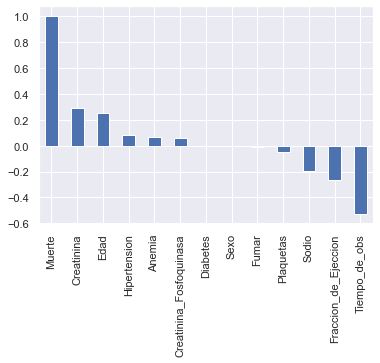

In [378]:
dataSet.corr()['Muerte'].sort_values(ascending = False).plot(kind = 'bar');

*Vemos correlacion entre todas las variables*

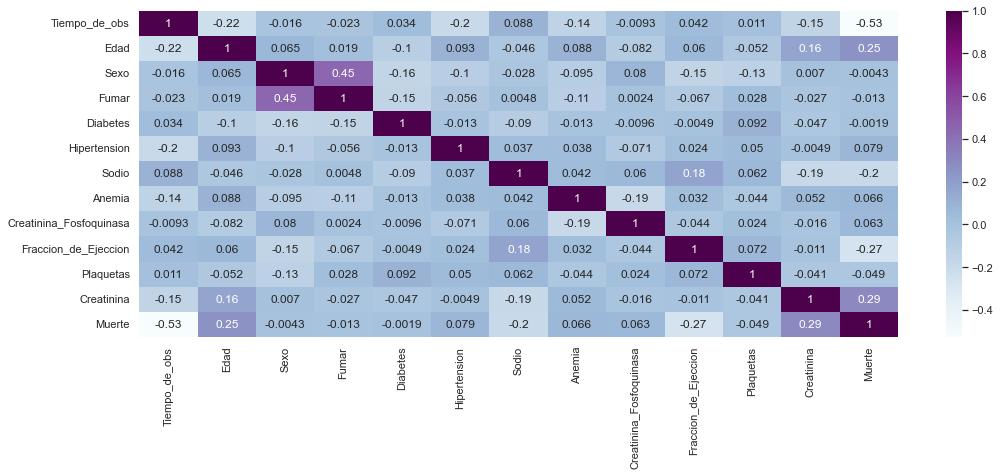

In [379]:
plt.figure(figsize = (17,6))
sns.heatmap(dataSet.corr(), annot = True, cmap="BuPu")
plt.show()

*Podemos ver que creatine_phospockinase muy poca correlacion con otras variable excepto anemia (y anemia no tiene fuerte correlacion con muerte).
Lo mismo sucede con diabetes.*

*Generamos una copia del data set para poder manipularlo*

In [380]:
newDataSet = dataSet.copy()

*Checkeamos la cantidad de valores fuera de rango*

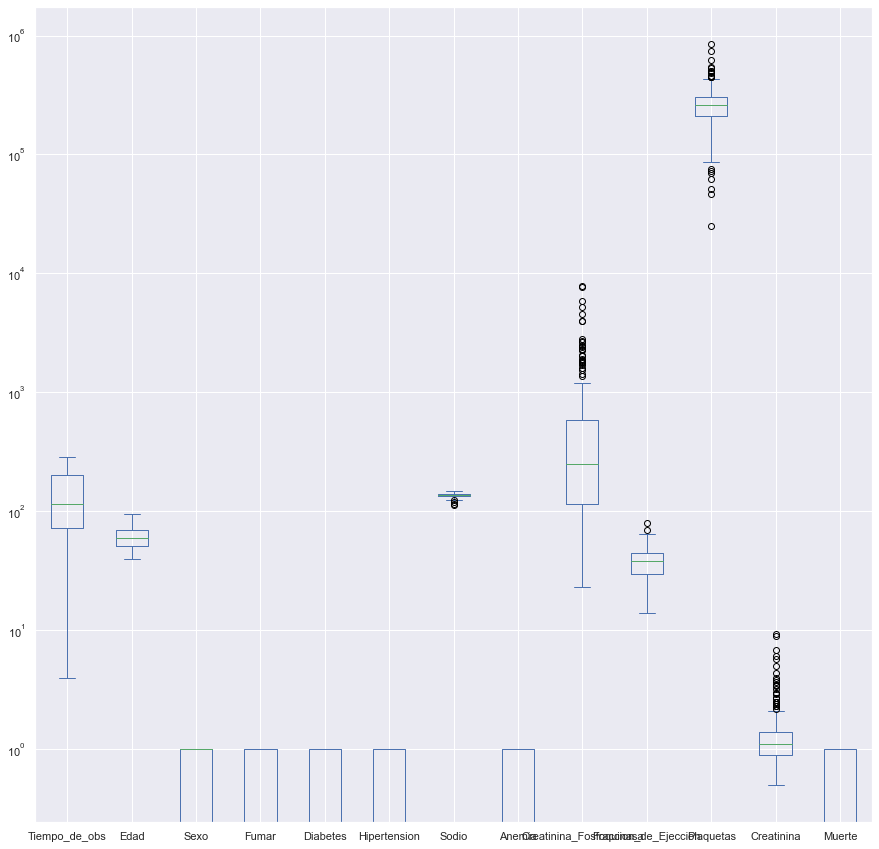

In [381]:
dataSet.plot(kind = 'box', figsize = (15, 15), logy = True);

*No podemos usar scaler con tantos puntos fuera de rango. 
Creamos funciones que se encarguen de encontrar y sacar puntos fuera de rango sobre cada variable.*

In [382]:
def mostrarDesubicados (DF, col, limFact):
    Q1 = DF[col].quantile(0.25)
    Q3 = DF[col].quantile(0.75)
    IQR = Q3 - Q1   
    lower = Q1 - limFact*IQR
    higher = Q3 + limFact*IQR
    return ((DF[col] < lower) | (DF[col] > higher)).sum()

def quitarDesubicados (DF, col, limFact):
    Q1 = DF[col].quantile(0.25)
    Q3 = DF[col].quantile(0.75)
    IQR = Q3 - Q1   
    lower = Q1 - limFact*IQR
    higher = Q3 + limFact*IQR
    DF = DF.loc[(DF[col] >= lower) & (DF[col] <= higher)]
    return DF

In [383]:
outliners = []
for col in list(newDataSet):
    outliners.append(mostrarDesubicados(newDataSet, col, 1.5))
dic = dict(zip(np.array(list(newDataSet)), np.array(outliners)))
print(dic)

{'Tiempo_de_obs': 0, 'Edad': 0, 'Sexo': 0, 'Fumar': 0, 'Diabetes': 0, 'Hipertension': 0, 'Sodio': 4, 'Anemia': 0, 'Creatinina_Fosfoquinasa': 29, 'Fraccion_de_Ejeccion': 2, 'Plaquetas': 21, 'Creatinina': 29, 'Muerte': 0}


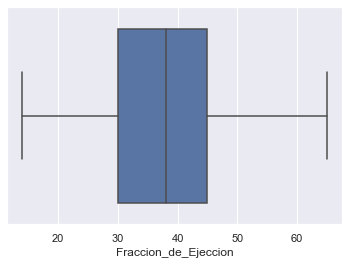

In [384]:
newDataSet = quitarDesubicados(newDataSet, 'Fraccion_de_Ejeccion', 1.5)
fig, ax = plt.subplots()
sns.boxplot(x = newDataSet['Fraccion_de_Ejeccion']);

In [385]:
mostrarDesubicados(newDataSet, 'Fraccion_de_Ejeccion', 1.5)

0

*Confirmamos la efectividad de las funciones de extraccion de datos excepcionales funciona. Repetimos la extraccion de puntos fueras de rangos esperados para el resto de las columnas*

In [386]:
for col in list(newDataSet):
    newDataSet = quitarDesubicados(newDataSet, col, 1.5)
outliners = []
for col in list(newDataSet):
    outliners.append(mostrarDesubicados(newDataSet, col, 1.5))
dic = dict(zip(np.array(list(newDataSet)), np.array(outliners)))
print(dic)

{'Tiempo_de_obs': 0, 'Edad': 0, 'Sexo': 0, 'Fumar': 0, 'Diabetes': 0, 'Hipertension': 0, 'Sodio': 0, 'Anemia': 0, 'Creatinina_Fosfoquinasa': 0, 'Fraccion_de_Ejeccion': 0, 'Plaquetas': 0, 'Creatinina': 3, 'Muerte': 0}


In [387]:
# for col in list(newDataSet):
#     newDataSet = quitarDesubicados(newDataSet, col, 1.5)
# outliners = []
# for col in list(newDataSet):
#     outliners.append(mostrarDesubicados(newDataSet, col, 1.5))
# dic = dict(zip(np.array(list(newDataSet)), np.array(outliners)))
# print(dic)

In [388]:
newDataSet.describe()

,Tiempo_de_obs,Edad,Sexo,Fumar,Diabetes,Hipertension,Sodio,Anemia,Creatinina_Fosfoquinasa,Fraccion_de_Ejeccion,Plaquetas,Creatinina,Muerte
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,132.651786,60.809527,0.642857,0.321429,0.419643,0.379464,137.044643,0.46875,336.941964,38.178571,255865.190045,1.128571,0.272321
std,76.579770,11.946085,0.480231,0.468071,0.494606,0.486340,3.806740,0.50014,279.521085,11.710801,67153.749051,0.327794,0.446151
min,4.000000,40.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.00000,30.000000,14.000000,122000.000000,0.600000,0.000000
25%,75.750000,50.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.00000,114.500000,30.000000,210000.000000,0.900000,0.000000
50%,120.000000,60.000000,1.000000,0.000000,0.000000,0.000000,137.000000,0.00000,212.000000,38.000000,262500.000000,1.100000,0.000000
75%,205.000000,70.000000,1.000000,1.000000,1.000000,1.000000,140.000000,1.00000,582.000000,45.000000,297250.000000,1.300000,1.000000
max,285.000000,95.000000,1.000000,1.000000,1.000000,1.000000,148.000000,1.00000,1202.000000,65.000000,427000.000000,2.100000,1.000000


*Se extrayeron en total 15 casos de 239, quedando un dataser del 93,7% de tamaño respecto del anterior. Se considera aceptable para proseguir utilizando este nuevo dataset filtrado.*

*Si se seguia iterando, aparecian nuevos outliers y para llegar a 0 en todos, quedabamos con un dataset de 141 lineas que era muy poco*

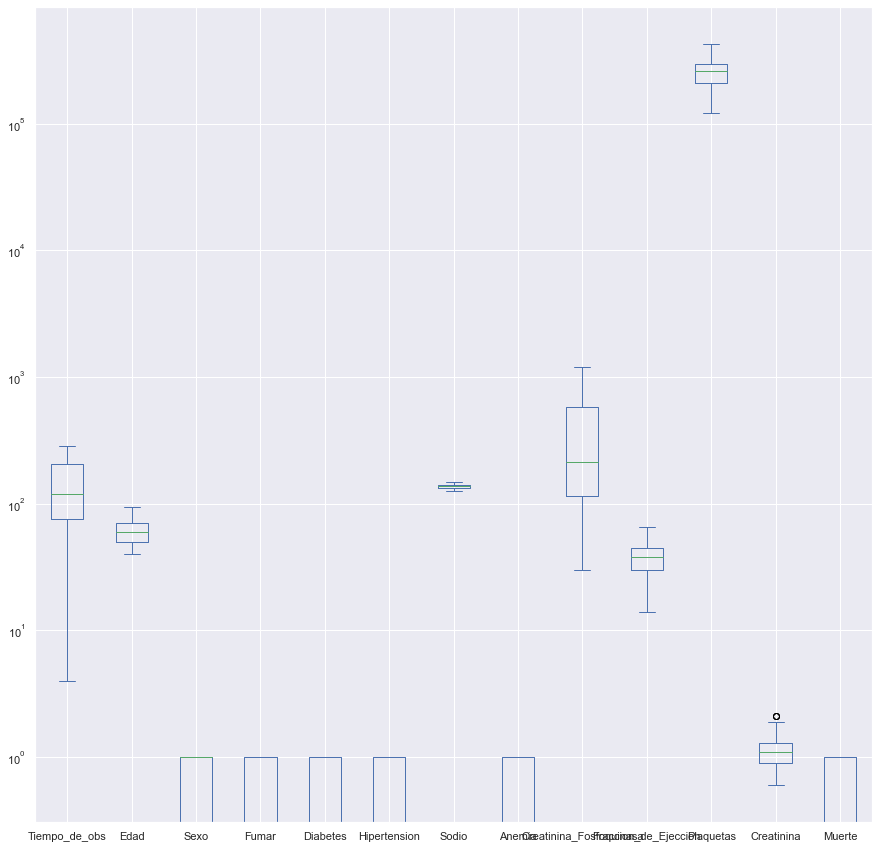

In [389]:
newDataSet.plot(kind = 'box', figsize = (15, 15), logy = True);

*A continuacion veremos los solapamientos de puntos para ver que metodos de machine learning son mejores para utilizar*

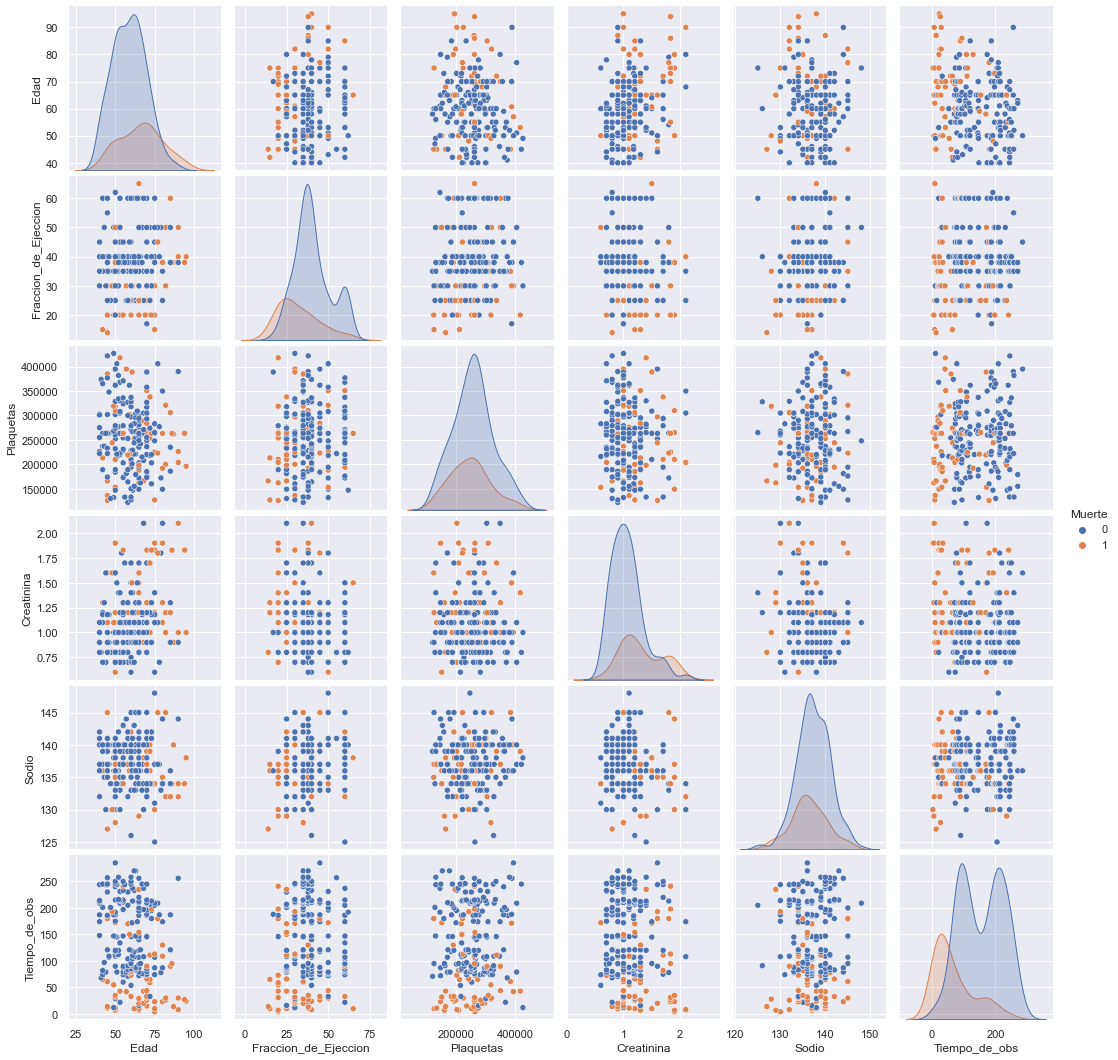

In [390]:
# Vemos solo las variables no booleanas
sns.pairplot(newDataSet[['Edad','Fraccion_de_Ejeccion','Plaquetas','Creatinina','Sodio','Tiempo_de_obs','Muerte']], hue = 'Muerte');

*Claramente no podemos aplicar regresion lineal. Podemos aplicar regresion logaritmica, Decision Tree, Random Forest o KNN para asi poder agrupar el importante solapamiento que se puede observar*

*____________________________________________________________________________*

**Analisis de valores de variables**

Estudiando cada una de las medidas medicas, sabemos que valores son normales

*Anemia* = falla en una correcta distribución del oxígeno en sangre. No implica riesgo directo en falla cardíaca.


*Presión sanguínea* = el principal riesgo derivado de la hipertensión es el de ataques cardíacos, así como también de ACV y aumento del glaucoma por excesiva presión ocular sobre la retina.

***Rango de presiones       Sistólica        Diastólica***

         Bajo                  < 90             < 60

         Normal             [90 - 120)        [60 - 80)

         Elevada            [120 - 129)       [60 - 80)
         
         Alta                  > 129            > 80

*Creatinina fosfoquinasa* = conocida como creatinquinasa, es un clásico indicador de que el usuario tiene una aritmia cardíaca o que está por hacer un infarto cardíaco dentro de las 24 a 36 hs. Su aumento también puede deberse a otros factores como quemaduras o ejercicio intenso.

***CPK normal values: 10 - 120 mcg/L***


*Fraccion de eyección* = indica qué tanta sangre logra evacuar el corazón. Esta relacionado a la fuerza del mismo y es un indicador de infacto cardíaco por mal bombeo de sangre o problemas en las válvulas cardíacas.

***Fraction ejection normal values: 50 - 75 %***


*Plaquetas en sangre* = las plaquetas se encargan de coagular sangre para prevenir su fuga (hacer cascaritas). 

En caso de tener los niveles bajos, podemos estar frente a un caso peligroso de trombosis interna. Puede ser causa de infarto por pérdida de sangre.

Altos niveles de plaquetas puede implicar una existencia de celulas anormales en la médula roja o estar cursando anemia, cancer, infección o inflamación.

Niveles anormales junto con sintomas de coagulaciones en las extremidades, de no ser tratados pueden generar un ataque cardíaco o desmayo.

***CBC normal values: 150.000 - 450.000 un/microL***


*Creatinina en suero* = esta vinculado al funcionamiento de los riñones. La creatinina es un desperdicio que debe ser filtrado por los riñones. En caso de tener elevadas cantidades en sangre, implica que los riñones no estan funcionando bien.

***Concentración normal de creatinina en suero:***

        Hombres: 0,7 - 1,3 mg/dL             Mujeres: 0,6 - 1,1 mg/dL

***Riesgo de infarto según niveles de creatinina:***

        Infarto Alto:           > 1,31 mg/dL (percentil 90vo)
        Hisquemia Alta:         > 1,47 mg/dL (percentil 97,5)


*Sodio en suero* = es un indicador para conocer el nivel de electrolitos, acidos, agua en sangre y el funcionamiento renal. Niveles altos de sodio se asocian a un alto riesgo de desarrollar hipertensión.

***Concentración normal de sodio en suero: 135 - 147 mmol/L***

______________________________________________________________________

***Estudio un data set de Pasa/NoPasa para cada parametro y si muere o no***

*Para profundizar el estudio, reemplazaremos los valores de los análisis segán si están dentro del rango normal o no*
*Este procesamiento de datos hace muy rígido el análisis ya que no pondera la lejanía de los valores respecto de su rango normal. Es para una lectura vaga*

In [391]:
acceptanceDataSet = newDataSet.copy()

acceptanceDataSet.Creatinina_Fosfoquinasa = np.where((acceptanceDataSet.Creatinina_Fosfoquinasa < 10) | (acceptanceDataSet.Creatinina_Fosfoquinasa > 120), 1, 0)
acceptanceDataSet.Fraccion_de_Ejeccion = np.where((acceptanceDataSet.Fraccion_de_Ejeccion < 50) | (acceptanceDataSet.Fraccion_de_Ejeccion > 75), 1, 0)
acceptanceDataSet.Plaquetas = np.where((acceptanceDataSet.Plaquetas < 150000) | (acceptanceDataSet.Plaquetas > 450000), 1, 0)
#acceptanceDataSet.serum_creatinine = np.where((((acceptanceDataSet.sex = 1)&((acceptanceDataSet.serum_creatinine < 0.7) | (acceptanceDataSet.serum_creatinine > 1.3))) | ((acceptanceDataSet.sex = 0)&((acceptanceDataSet.serum_creatinine < 0.6) | (acceptanceDataSet.serum_creatinine > 1.1)))), 1, 0)
acceptanceDataSet.Creatinina = np.where((acceptanceDataSet.Creatinina < 0.7) | (acceptanceDataSet.Creatinina > 1.3), 1, 0)
acceptanceDataSet.Sodio = np.where((acceptanceDataSet.Sodio < 135) | (acceptanceDataSet.Sodio > 147), 1, 0)

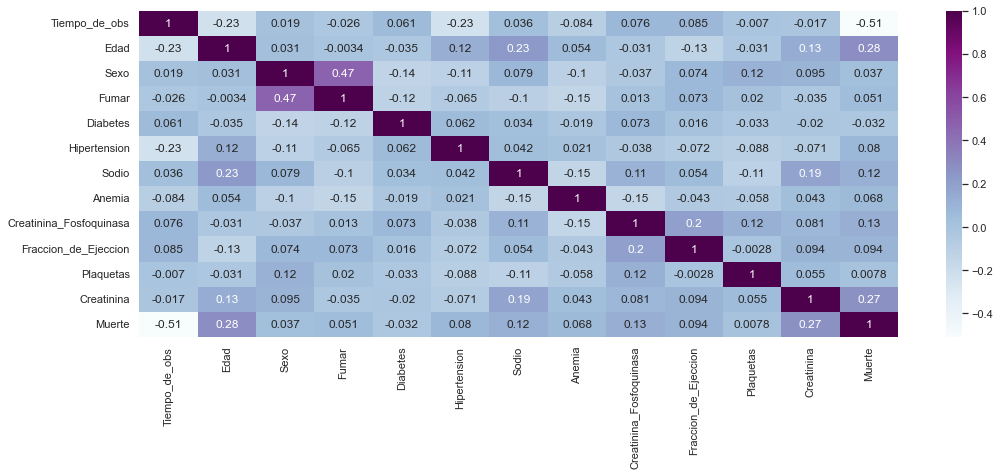

In [392]:
plt.figure(figsize = (17,6))
sns.heatmap(acceptanceDataSet.corr(), annot = True, cmap="BuPu")
plt.show()

In [393]:
acceptDeathDataSet = acceptanceDataSet[acceptanceDataSet['Muerte'] == 1]
acceptAliveDataSet = acceptanceDataSet[acceptanceDataSet['Muerte'] == 0]

In [394]:
deathAspects = {}
preDF = acceptDeathDataSet.drop(['Edad', 'Tiempo_de_obs','Muerte'], axis = 1)
for col in list(preDF):
    case = preDF[col].value_counts(normalize=True)
    deathAspects[col] = case.loc[1]*100
    print(col, "=", '{0:.1f}'.format(deathAspects[col]),"%")

Sexo = 67.2 %
Fumar = 36.1 %
Diabetes = 39.3 %
Hipertension = 44.3 %
Sodio = 34.4 %
Anemia = 52.5 %
Creatinina_Fosfoquinasa = 82.0 %
Fraccion_de_Ejeccion = 85.2 %
Plaquetas = 6.6 %
Creatinina = 37.7 %


In [395]:
aliveAspects = {}
preDF = acceptAliveDataSet.drop(['Edad', 'Tiempo_de_obs','Muerte'], axis = 1)
for col in list(preDF):
    case = preDF[col].value_counts(normalize=True)
    aliveAspects[col] = case.loc[1]*100
    print(col, "=", '{0:.1f}'.format(aliveAspects[col]),"%")

Sexo = 63.2 %
Fumar = 30.7 %
Diabetes = 42.9 %
Hipertension = 35.6 %
Sodio = 22.7 %
Anemia = 44.8 %
Creatinina_Fosfoquinasa = 69.3 %
Fraccion_de_Ejeccion = 76.7 %
Plaquetas = 6.1 %
Creatinina = 13.5 %


**Devolución de valores - un primer aproach predictivo:**

*A traves de los porcentajes recien desplegados, podemos ver como existe una diferencia notoria de porcentaje de gente con ciertos valores del estudio no aceptable entre los muertos y vivos*

*Mayor porcentaje de la gente que murió presentaba niveles anormales de:* 
    
    creatinina en sangre 
    creatinina fosfoquinasa
    sodio en sangre
    hipertensión
    fracción de eyección

*Es posible que varios de estos valores esten de alguna forma vinculados, como el nivel de sodio e hipertensión.*

*Ver que los niveles de creatinina en sangre muestran una diferencia de porcentaje de irregularidades entre muertos y vivos, nos abre la pregunta de si las fallas renales son una causa de infacto cardíaco.*

*En contrapartida a lo que uno estimaría a simple previo a estos análisis, los reportes de niveles anormales de creatinina fosfoquinasa no son totalmente dispares entre vivos y muertos. Hablando de una encima que eleva sus valores previo a un infarto, da pie a pensar que podría no ser un indicador tan fiable.*

In [396]:
acceptDeathDataSet.describe()

,Tiempo_de_obs,Edad,Sexo,Fumar,Diabetes,Hipertension,Sodio,Anemia,Creatinina_Fosfoquinasa,Fraccion_de_Ejeccion,Plaquetas,Creatinina,Muerte
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,69.213115,66.306016,0.672131,0.360656,0.393443,0.442623,0.344262,0.524590,0.819672,0.852459,0.065574,0.377049,1.0
std,63.762610,13.530662,0.473333,0.484176,0.492568,0.500819,0.479070,0.503539,0.387651,0.357588,0.249590,0.488669,0.0
min,4.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,23.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0
50%,43.000000,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
75%,95.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0
max,241.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [397]:
acceptAliveDataSet.describe()

,Tiempo_de_obs,Edad,Sexo,Fumar,Diabetes,Hipertension,Sodio,Anemia,Creatinina_Fosfoquinasa,Fraccion_de_Ejeccion,Plaquetas,Creatinina,Muerte
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.0
mean,156.392638,58.752558,0.631902,0.306748,0.429448,0.355828,0.226994,0.447853,0.693252,0.766871,0.06135,0.134969,0.0
std,66.965574,10.630378,0.483774,0.462565,0.496523,0.480239,0.420179,0.498806,0.462565,0.424127,0.24071,0.342744,0.0
min,12.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
25%,94.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.0
50%,148.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.0
75%,212.500000,65.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.0
max,285.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0


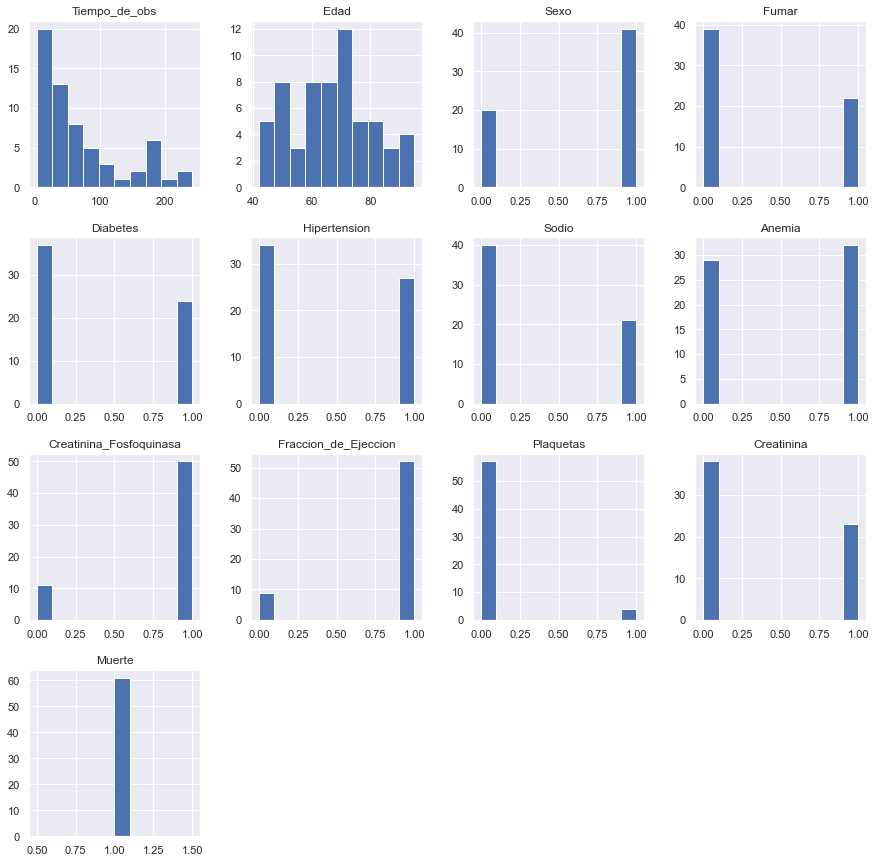

In [398]:
acceptDeathDataSet.hist(figsize = (15,15));

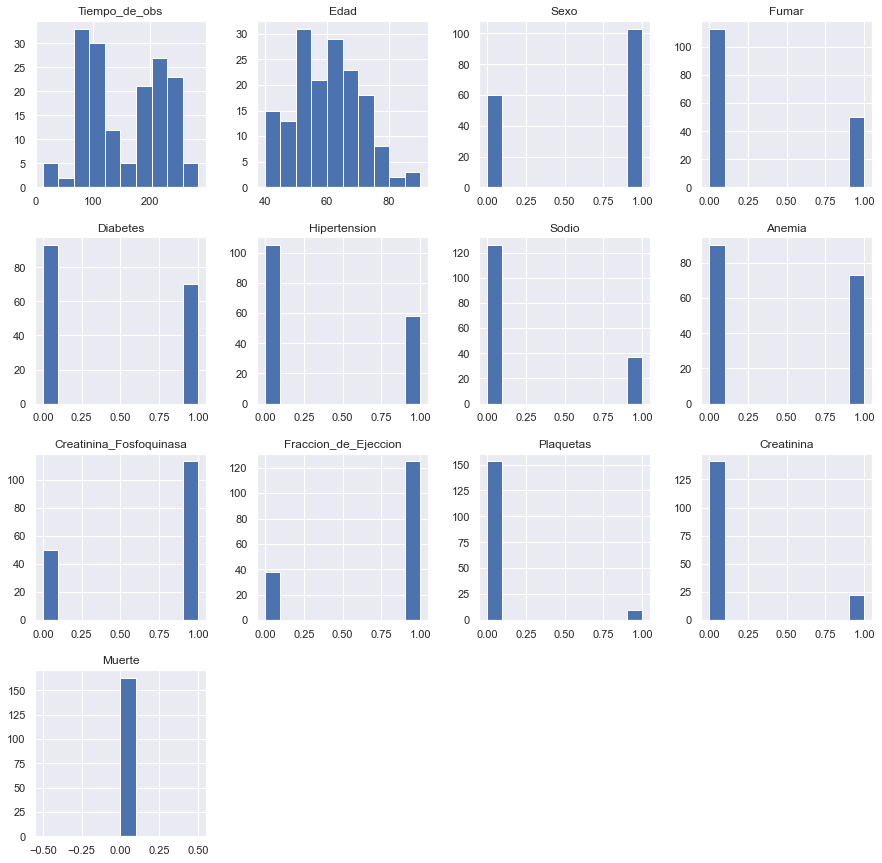

In [399]:
acceptAliveDataSet.hist(figsize = (15,15));

_______________________________________________________________________
_______________________________________________________________________

**PARTE 2: MANIPULACIÓN DE DATOS Y ANÁLISIS PREDICTIVO**

**Ecualizacion de valores**

*Debido a la diferencia en escalas de valores de las variables dadas, debemos ecualizarlas. Lo podemos hacer mediante normalizacion o estandarizacion.*

*Como tenemos variables booleanas con valores entre 0 y 1, optamos por normalizar.*

In [400]:
scaler = MaxAbsScaler()
scaler.fit(newDataSet)
scaled = scaler.transform(newDataSet)
scaled_newDataSet = pd.DataFrame(scaled, columns = newDataSet.columns)
scaled_newDataSet.head()

,Tiempo_de_obs,Edad,Sexo,Fumar,Diabetes,Hipertension,Sodio,Anemia,Creatinina_Fosfoquinasa,Fraccion_de_Ejeccion,Plaquetas,Creatinina,Muerte
0,0.014035,0.789474,1.0,0.0,0.0,1.0,0.878378,0.0,0.484193,0.307692,0.620609,0.904762,1.0
1,0.024561,0.684211,1.0,1.0,0.0,0.0,0.871622,0.0,0.121464,0.307692,0.379391,0.619048,1.0
2,0.024561,0.526316,1.0,0.0,0.0,0.0,0.925676,1.0,0.092346,0.307692,0.491803,0.904762,1.0
3,0.028070,0.947368,1.0,1.0,0.0,1.0,0.891892,1.0,0.039101,0.615385,0.477752,1.000000,1.0
4,0.035088,0.789474,1.0,0.0,0.0,0.0,0.925676,1.0,0.204659,0.230769,0.297424,0.571429,1.0


***(hacer una regresion logaritmica sin poner intervalos de aceptacion)***

**Creacion del conjunto de entrenamiento y prueba**

In [401]:
X = scaled_newDataSet.drop('Muerte', axis = 1)
y = scaled_newDataSet['Muerte']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

**Generalizacion de aleatoreaidad**

In [402]:
randomness = 1

*____________________________________________________________________________*

**Analisis de ruido y reduccion de datos**

In [403]:
pca = PCA(n_components = 2)
pca.fit(scaled_newDataSet)
transformada = pca.transform(scaled_newDataSet)
print(scaled_newDataSet.shape)
print(transformada.shape)

(224, 13)
(224, 2)


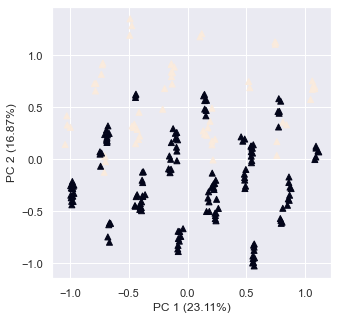

In [404]:
# from sklearn import datasets
# data,target = datasets.load_iris(return_X_y=True)

# mglearn.discrete_scatter(transformada[:,0], transformada[:,1], scaled_newDataSet['DEATH_EVENT'])
# plt.legend(list(scaled_newDataSet), loc = 'best')

plt.figure(figsize = (5,5))
# plt.scatter(transformada[:,0], transformada[:,1], edgecolor='', alpha=0.5)
plt.scatter(transformada[:,0], transformada[:,1], c=scaled_newDataSet['Muerte'], marker = '^')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
plt.show()

*____________________________________________________________________________*

***Logistic Regresion***

Text(89.18, 0.5, 'Predicción')

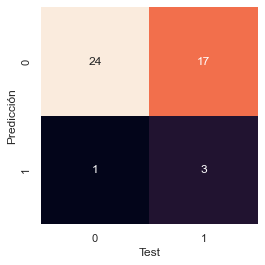

In [405]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
sns.set()
mapa = confusion_matrix(y_test, y_predict)
sns.heatmap(mapa.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Test')
plt.ylabel('Predicción')

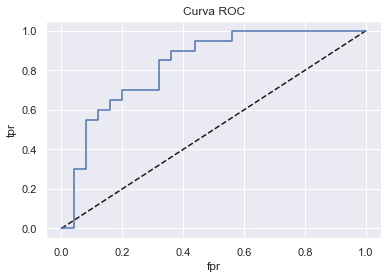

0.8280000000000001


In [406]:
probas = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC')
plt.show()

print(roc_auc_score(y_test, probas[:, 1]))

In [407]:
print("R2 score =", round(metrics.r2_score(y_test, y_predict), 2))

R2 score = -0.62


In [408]:
accLR1 = metrics.accuracy_score(y_predict,y_test)
print('Confiabilidad: ', '{0:.1f}'.format(accLR1*100), '%')

Confiabilidad:  60.0 %


In [409]:
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.59      0.96      0.73        25
         1.0       0.75      0.15      0.25        20

    accuracy                           0.60        45
   macro avg       0.67      0.55      0.49        45
weighted avg       0.66      0.60      0.52        45



In [410]:
print(model.coef_)

[[-3.3866342   1.37137686 -0.22771847  0.11370255 -0.0991345  -0.06139888
  -0.15927719  0.28159409  0.44388953 -1.89075276 -0.36503997  1.70309171]]


In [411]:
cols = scaled_newDataSet.drop('Muerte', axis = 1)
i = 0
for index, item in enumerate(list(cols)):
    print(item, "=", '{0:.3f}'.format(model.coef_[0][index]))

Tiempo_de_obs = -3.387
Edad = 1.371
Sexo = -0.228
Fumar = 0.114
Diabetes = -0.099
Hipertension = -0.061
Sodio = -0.159
Anemia = 0.282
Creatinina_Fosfoquinasa = 0.444
Fraccion_de_Ejeccion = -1.891
Plaquetas = -0.365
Creatinina = 1.703


*Estos coeficientes determinan el nivel de influencia que tiene cada variable en la determinacion de la muerte*

*Los factores que más influencia directa causan en la muerte son:*
    
    Edad
    Fraccion de ejeccion
    Creatinina en sangre

*Otros factores que tienen influencia pero menor a un 100% aunque mayor a un 10%, son:*

    Creatina fosfoquinasa
    Plaquetas
    Fumar

*No incluimos el tiempo en estudio ya que no es una variable de salud*

*____________________________________________________________________________*

**Clustering**

*Veamos si encontramos fuerte vinculacion entre variables a ver si podemos sacar alguna del dataset*

In [412]:
scaled_newDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tiempo_de_obs            224 non-null    float64
 1   Edad                     224 non-null    float64
 2   Sexo                     224 non-null    float64
 3   Fumar                    224 non-null    float64
 4   Diabetes                 224 non-null    float64
 5   Hipertension             224 non-null    float64
 6   Sodio                    224 non-null    float64
 7   Anemia                   224 non-null    float64
 8   Creatinina_Fosfoquinasa  224 non-null    float64
 9   Fraccion_de_Ejeccion     224 non-null    float64
 10  Plaquetas                224 non-null    float64
 11  Creatinina               224 non-null    float64
 12  Muerte                   224 non-null    float64
dtypes: float64(13)
memory usage: 22.9 KB


In [413]:
kmeans = KMeans(n_clusters = 2)
prediccion = kmeans.fit(X)

In [414]:
correctos = 0
X = np.array(X);
y = np.array(y);
for i in range(len(X)):
    predecido = np.array(X[i].astype(float));
    predecido = predecido.reshape(-1, len(predecido));
    prediccion = kmeans.predict(predecido);
    if prediccion[0] == y[i]:
        correctos += 1
accKN1 = correctos/len(X)
print('Confiabilidad: ', '{0:.1f}'.format(accKN1*100), '%');

Confiabilidad:  54.9 %


In [415]:
# erroresCuadrados = []
# K = range(1,2)
# for k in K:
#     predecido = np.array(X[i].astype(float))
#     predecido = predecido.reshape(-1, len(predecido))
#     prediccion = kmeans.predict(predecido)
#     erroresCuadrados.append(prediccion.inertia_)
# print(erroresCuadrados)

*A continuacion, calculo en numero optimo de clusters*

*Sera equivalente al modelo con dicho numero de clusters que se encuentre en el punto en donde el marginal del gradiante de reduccion de inercia cruce un punto de inflexion. Por encima de este punto, la reduccion en inercia al procesar un modelo con 1 cluster mas no es tan grande como el paso anterior de aumento, por lo que alcanza un maximo en la curva de costo-beneficio*

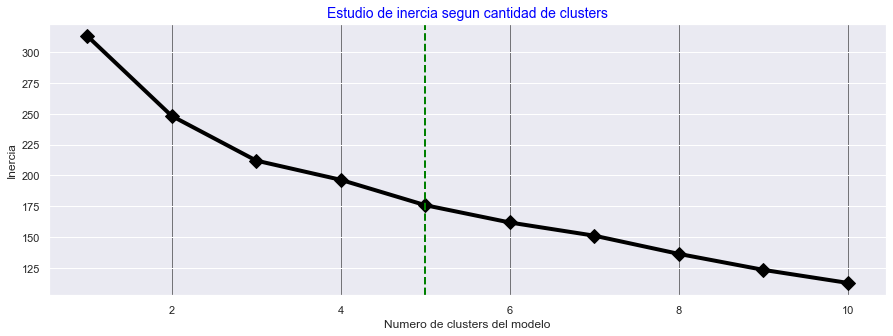

In [416]:
inercias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = randomness)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

plt.figure(figsize = (15,5))
plt.plot(range(1,11), inercias, linewidth = 4, color = 'black', marker = 'D', markersize = 10)
plt.title('Estudio de inercia segun cantidad de clusters', family = 'Arial', fontsize = 14, color = 'blue')
plt.xlabel('Numero de clusters del modelo')
plt.ylabel('Inercia')
plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)
plt.axvline(x = 5, linewidth = 2, color = 'green', linestyle = '--')
plt.show()

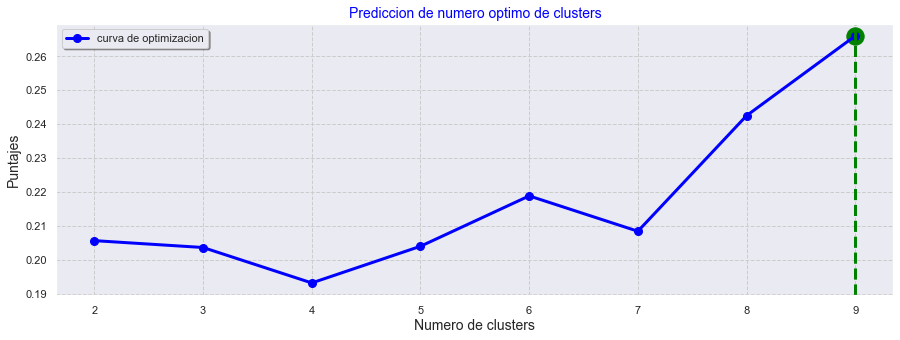

In [417]:
from sklearn.metrics import silhouette_score

versiones_kmeans = [KMeans(n_clusters = k, random_state = randomness).fit(X) for k in range(1, 10)]
puntajes = [silhouette_score(X, model.labels_) for model in versiones_kmeans[1:]]

plt.figure(figsize = (15,5))
plt.plot(range(2, 10), puntajes, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'curva de optimizacion')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Prediccion de numero optimo de clusters', family = 'Arial', fontsize = 14, color = 'blue')
plt.xlabel("Numero de clusters", fontsize = 14)
plt.ylabel("Puntajes", fontsize = 14)

k = np.argmax(puntajes) + 2 
plt.axvline(x = k, linestyle = '--', color = 'green', linewidth = 3)
plt.scatter(k, puntajes[k-2], color = 'green', s=300)
plt.legend(shadow=True)
plt.show()

*Optaremos por 6 clusters ya que el primer modelo fue hecho a ojo*

In [418]:
kmeans = KMeans(n_clusters = 6) 
prediccion = kmeans.fit(X)

In [419]:
correctos = 0
X = np.array(X);
y = np.array(y);
for i in range(len(X)):
    predecido = np.array(X[i].astype(float));
    predecido = predecido.reshape(-1, len(predecido));
    prediccion = kmeans.predict(predecido);
    if prediccion[0] == y[i]:
        correctos += 1
accKN2 = correctos/len(X)
print('Confiabilidad: ', '{0:.1f}'.format(accKN2*100), '%');

Confiabilidad:  15.2 %


In [420]:
# erroresCuadrados = []
# K = range(1,6)
# for k in K:
#     predecido = np.array(X[i].astype(float))
#     predecido = predecido.reshape(-1, len(predecido))
#     prediccion = kmeans.predict(predecido)
#     erroresCuadrados.append(prediccion.inertia_)
# print(erroresCuadrados)

*____________________________________________________________________________*

***Árboles de Decisión***

In [421]:
model = DecisionTreeClassifier(random_state = randomness)
model.fit(X_train, y_train)
y_predicciones = model.predict(X_test)

In [422]:
accDT1=accuracy_score(y_test, y_predicciones)
print('Confiabilidad :', '{0:.1f}'.format(accDT1*100), '%')

Confiabilidad : 68.9 %


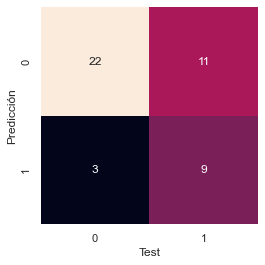

In [423]:
mapa = confusion_matrix(y_test, y_predicciones)
sns.heatmap(mapa.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Test')
plt.ylabel('Predicción');

*Vamos a modificar algunos hiperparametros a ver si mejoramos la prediccion*

In [424]:
model = DecisionTreeClassifier(random_state = randomness, max_depth = 5)
model.fit(X_train, y_train)
y_predicciones = model.predict(X_test)
accDT2=accuracy_score(y_test, y_predicciones)
print('Confiabilidad :', '{0:.1f}'.format(accDT2*100), '%')

Confiabilidad : 71.1 %


*Realizamos una busqueda por malla de validacion cruzada para cruzar todos los parametros y obtener los mejores hiperparametros*

*Los hiperparametros a modificar los seleccionamos nosotros al igual que las opciones. Cuantas mas combinaciones tengamos, mas tiempo de procesamiento va a demandar. Hay que buscar un balance*

In [425]:
from sklearn.model_selection import GridSearchCV

In [426]:
para = [{'max_depth' : np.arange(1, 20, 1), 
'max_features' : [None, np.arange(0, 3, 0.1)],  
'min_samples_split' : np.arange(0.1, 3, 0.1)}]

#en cv ingresamos el numero de iteraciones. n_job es el numero de nucleos que utiliza
busquedaMalla = GridSearchCV(cv = 8, scoring = 'accuracy', estimator = DecisionTreeClassifier(), n_jobs = -1, param_grid = para)
busquedaMalla.fit(X_train, y_train)
print(busquedaMalla.best_estimator_)

DecisionTreeClassifier(max_depth=1, min_samples_split=0.1)


In [427]:
y_bestPredicts = busquedaMalla.best_estimator_.predict(X_test)
accDT3=accuracy_score(y_test, y_bestPredicts)
print('Confiabilidad :', '{0:.1f}'.format(accDT3*100), '%')

Confiabilidad : 73.3 %


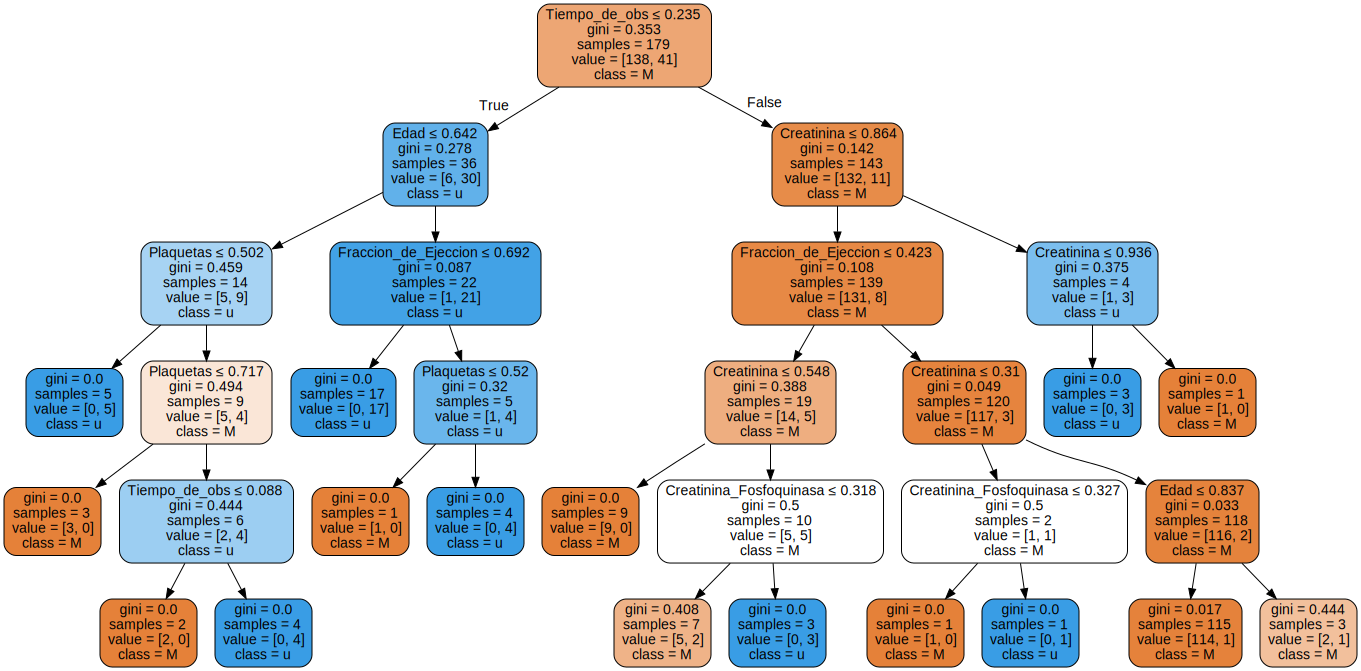

In [428]:
dot_data = tree.export_graphviz(model, out_file=None,feature_names=np.array(list(newDataSet.drop('Muerte', axis = 1))),class_names='Muerte',filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [429]:
from dtreeviz.trees import *

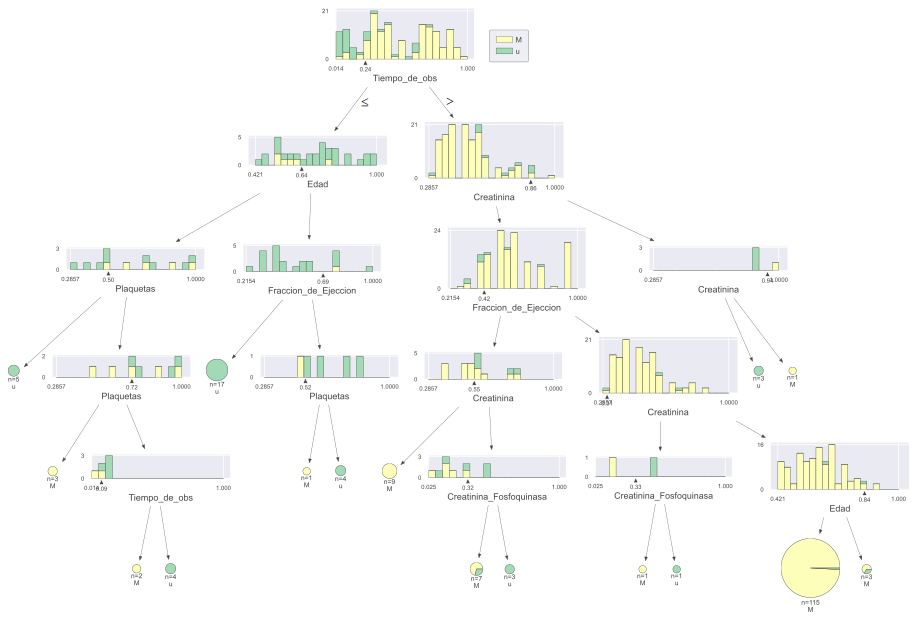

In [430]:
viz = dtreeviz(model, X_train, y_train, feature_names=np.array(list(newDataSet.drop('Muerte', axis = 1))),class_names='Muerte')
viz

*Vemos una baja en la confiabilidad. Posiblemente no estemos ingresando las debida variables y rangos para que la validacion cruzada nos de el mejor estimador. Por el momento descartamos es uso de los resultados entregados por esta busqueda de malla*

In [431]:
# def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
#     # Get Test Scores Mean and std for each grid search
#     scores_mean = cv_results['mean_test_score']
#     scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

#     scores_sd = cv_results['std_test_score']
#     scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

#     # Plot Grid search scores
#     _, ax = plt.subplots(1,1)

#     # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
#     for idx, val in enumerate(grid_param_2):
#         ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

#     ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
#     ax.set_xlabel(name_param_1, fontsize=16)
#     ax.set_ylabel('CV Average Score', fontsize=16)
#     ax.legend(loc="best", fontsize=15)
#     ax.grid('on')

# # Calling Method 

# plot_grid_search(busquedaMalla.best_estimator_, np.arange(1, 10, 2), np.arange(0.1, 1, 0.1), 'max_depth', 'max_features')

***Otro approach a Decision Tree***

In [432]:
# class Node():
#     def _init_(self, feature_index = None, threshold = None, left = None, right = None, info_gain = None, value = None):
#         self.feature_index = feature_index
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.info_gain = info_gain
#         self.value = value

# class DecisionTreeClassifier():
#     def _init_(self, min_samples_split = 2, max_depth = 2):
#         self.root = None
#         self.min_samples_split =min_samples_split
#         self.max_depth = max_depth
#     def build_tree(self, dataset, curr_depth = 0):
#         X, Y = dataset[:,:-1], dataset[:,-1]
#         num_samples, num_features = np.shape(X)
#         if num_samples >= self.get_best_split and curr_depth <= self.max_depth:
#             best_split = self.get_best_split(dataset, num_samples, num_features)
#             if best_split['info_gain'] > 0:
#                 left_subtree = self.build_tree(best_split['dataset_left'], curr_depth + 1)
#                 right_subtree = self.build_tree(best_split['dataset_right'], curr_depth + 1)
#                 return Node(best_split['feature_index'], best_split['threshold'], left_subtree, right_subtree, best_split['info_gain']
#         leaf_value = self.calculate_leaf_value(Y))
#         return Node(value = leaf_value)
#     def get_best_split(self, dataset, num_samples, num_features):
#         best_split = {}
#         max_info_gain = -float("inf")
#         for feature_index in range(num_features):
#             feature_values = dataset[:, feature_index]
#             possible_thresholds = np.unique(feature_values)
#             for threshold in possible_thresholds:
#                 dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
#                 if len(dataset_left) > 0 and len(dataset_right) > 0:
#                     y, left_y, right_y = dataset[:,-1], dataset_left[:,-1], dataset_right[:,-1]
#                     curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
#                     if curr_info_gain > max_info_gain:
#                         best_split['feature'] = feature_index
#                         best_split['threshold'] = threshold
#                         best_split['dataset_left'] = dataset_left
#                         best_split['dataset_right'] = dataset_right
#                         best_split['info_gain'] = curr_info_gain
#         return best_split


*____________________________________________________________________________*

***Random Forest***

In [433]:
forest = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = randomness)
forest.fit(X_train, y_train)
y_predicts = forest.predict(X_test)
accRF1=accuracy_score(y_test, y_predicts)
print('Confiabilidad :', '{0:.1f}'.format(accRF1*100), '%')

Confiabilidad : 66.7 %


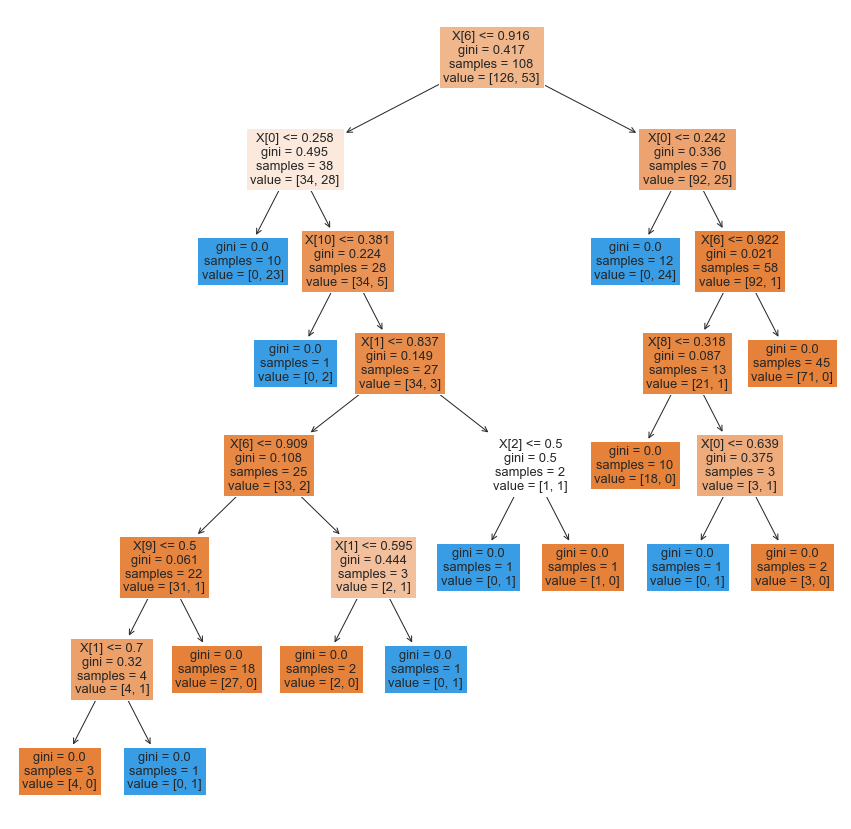

In [434]:
plt.figure(figsize=(15,15))
tree.plot_tree(forest.estimators_[900], filled =True);

In [435]:
print(tree.export_text(forest.estimators_[2]))

|--- feature_1 <= 0.71
|   |--- feature_8 <= 0.76
|   |   |--- feature_0 <= 0.06
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.06
|   |   |   |--- feature_0 <= 0.17
|   |   |   |   |--- feature_0 <= 0.11
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_0 >  0.11
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  0.17
|   |   |   |   |--- feature_0 <= 0.53
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_0 >  0.53
|   |   |   |   |   |--- feature_10 <= 0.90
|   |   |   |   |   |   |--- feature_1 <= 0.68
|   |   |   |   |   |   |   |--- feature_9 <= 0.42
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.57
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_1 >  0.57
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 0.48
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- feature_10 >  0.48
|   |   |   |   |   |   |   |   |   |   |--- c

In [436]:
feature_importances = pd.DataFrame(forest.feature_importances_*100, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
Tiempo_de_obs,37.480599
Fraccion_de_Ejeccion,13.563778
Creatinina,12.158861
Edad,11.789116
Plaquetas,7.511135
Creatinina_Fosfoquinasa,6.277420
Sodio,5.459968
Anemia,1.396516
Diabetes,1.362569
Sexo,1.202478


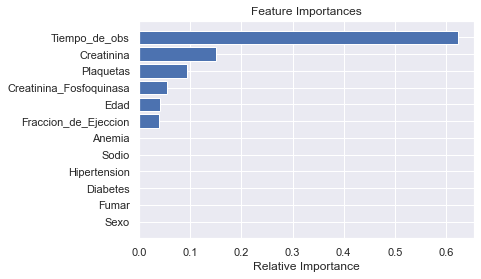

In [437]:
feature_importances = pd.DataFrame(forest.feature_importances_*100, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)
features = list(X_train)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

*____________________________________________________________________________*

**Evaluación de método de modelado con mejor valor de confianza**

In [438]:
print('Regresion Logaritmica')
print('> Confiabilidad: ', '{0:.1f}'.format(accLR1*100), '%')
print('Clustering')
print('> Confiabilidad: ', '{0:.1f}'.format(max(accKN1, accKN2)*100), '%')
print('Arbol de Decisiones')
print('> Confiabilidad: ', '{0:.1f}'.format(max(accDT1, accDT2, accDT3)*100), '%')
print('Random Forest')
print('> Confiabilidad: ', '{0:.1f}'.format(accRF1*100), '%')

Regresion Logaritmica
> Confiabilidad:  60.0 %
Clustering
> Confiabilidad:  54.9 %
Arbol de Decisiones
> Confiabilidad:  73.3 %
Random Forest
> Confiabilidad:  66.7 %


*Vemos que el modelo mas confiable para recurrir a modelar el caso de pronostico es el Random Forest*

*____________________________________________________________________________*

*____________________________________________________________________________*

***Borramos las columnas que consideramos que aportan poco y volvemos a correr los modelos***

In [440]:
reduced_newDataSet = newDataSet.drop(['Tiempo_de_obs', 'Sexo', 'Diabetes', 'Hipertension', 'Fumar', 'Anemia'], axis = 1)

scaler = MaxAbsScaler()
scaler.fit(reduced_newDataSet)
scaled = scaler.transform(reduced_newDataSet)
scaled_newDataSet = pd.DataFrame(scaled, columns = reduced_newDataSet.columns)
scaled_newDataSet.head()

,Edad,Sodio,Creatinina_Fosfoquinasa,Fraccion_de_Ejeccion,Plaquetas,Creatinina,Muerte
0,0.789474,0.878378,0.484193,0.307692,0.620609,0.904762,1.0
1,0.684211,0.871622,0.121464,0.307692,0.379391,0.619048,1.0
2,0.526316,0.925676,0.092346,0.307692,0.491803,0.904762,1.0
3,0.947368,0.891892,0.039101,0.615385,0.477752,1.000000,1.0
4,0.789474,0.925676,0.204659,0.230769,0.297424,0.571429,1.0


In [441]:
X = scaled_newDataSet.drop('Muerte', axis = 1)
y = scaled_newDataSet['Muerte']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [442]:
X = scaled_newDataSet.drop('Muerte', axis = 1)
y = scaled_newDataSet['Muerte']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [443]:
randomness = 1

**Analisis de ruido y reduccion de datos**

In [444]:
pca = PCA(n_components = 2)
pca.fit(scaled_newDataSet)
transformada = pca.transform(scaled_newDataSet)
print(scaled_newDataSet.shape)
print(transformada.shape)

(224, 7)
(224, 2)


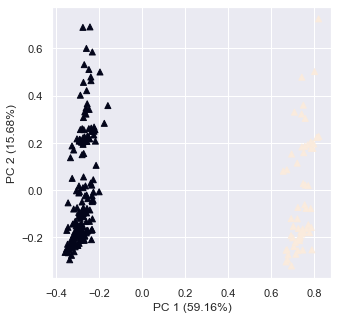

In [445]:
plt.figure(figsize = (5,5))
plt.scatter(transformada[:,0], transformada[:,1], c=scaled_newDataSet['Muerte'], marker = '^')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
plt.show()

***Logistic Regresion***

Text(89.18, 0.5, 'Predicción')

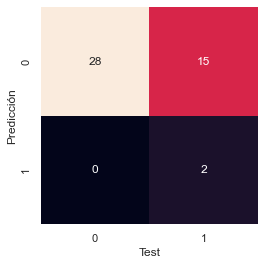

In [446]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
sns.set()
mapa = confusion_matrix(y_test, y_predict)
sns.heatmap(mapa.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Test')
plt.ylabel('Predicción')

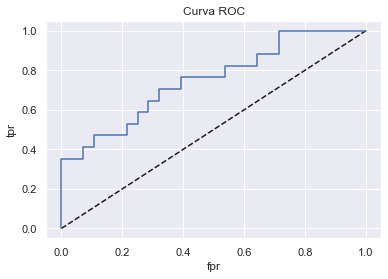

0.75


In [447]:
probas = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC')
plt.show()

print(roc_auc_score(y_test, probas[:, 1]))

In [448]:
print("R2 score =", round(metrics.r2_score(y_test, y_predict), 2))

R2 score = -0.42


In [449]:
accLR1 = metrics.accuracy_score(y_predict,y_test)
print('Confiabilidad: ', '{0:.1f}'.format(accLR1*100), '%')

Confiabilidad:  66.7 %


In [450]:
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        28
         1.0       1.00      0.12      0.21        17

    accuracy                           0.67        45
   macro avg       0.83      0.56      0.50        45
weighted avg       0.78      0.67      0.57        45



In [451]:
print(model.coef_)

[[ 1.66841506 -0.12267151  0.22545554 -2.0039754  -0.40715429  1.81186326]]


In [452]:
cols = scaled_newDataSet.drop('Muerte', axis = 1)
i = 0
for index, item in enumerate(list(cols)):
    print(item, "=", '{0:.3f}'.format(model.coef_[0][index]))

Edad = 1.668
Sodio = -0.123
Creatinina_Fosfoquinasa = 0.225
Fraccion_de_Ejeccion = -2.004
Plaquetas = -0.407
Creatinina = 1.812


**Clustering**

In [453]:
scaled_newDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     224 non-null    float64
 1   Sodio                    224 non-null    float64
 2   Creatinina_Fosfoquinasa  224 non-null    float64
 3   Fraccion_de_Ejeccion     224 non-null    float64
 4   Plaquetas                224 non-null    float64
 5   Creatinina               224 non-null    float64
 6   Muerte                   224 non-null    float64
dtypes: float64(7)
memory usage: 12.4 KB


In [454]:
kmeans = KMeans(n_clusters = 2)
prediccion = kmeans.fit(X)

In [455]:
correctos = 0
X = np.array(X);
y = np.array(y);
for i in range(len(X)):
    predecido = np.array(X[i].astype(float));
    predecido = predecido.reshape(-1, len(predecido));
    prediccion = kmeans.predict(predecido);
    if prediccion[0] == y[i]:
        correctos += 1
accKN1 = correctos/len(X)
print('Confiabilidad: ', '{0:.1f}'.format(accKN1*100), '%');

Confiabilidad:  60.3 %


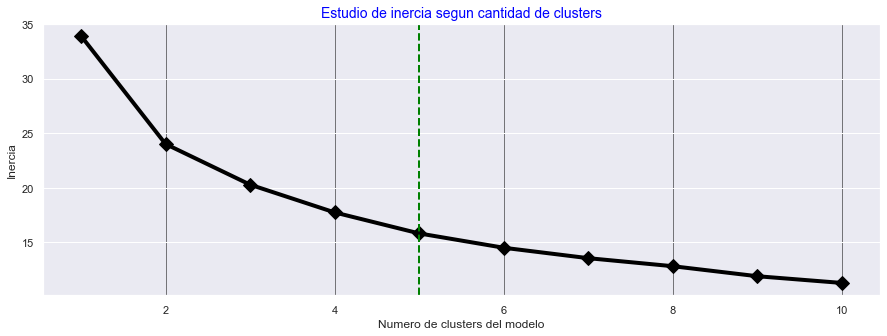

In [456]:
inercias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = randomness)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

plt.figure(figsize = (15,5))
plt.plot(range(1,11), inercias, linewidth = 4, color = 'black', marker = 'D', markersize = 10)
plt.title('Estudio de inercia segun cantidad de clusters', family = 'Arial', fontsize = 14, color = 'blue')
plt.xlabel('Numero de clusters del modelo')
plt.ylabel('Inercia')
plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)
plt.axvline(x = 5, linewidth = 2, color = 'green', linestyle = '--')
plt.show()

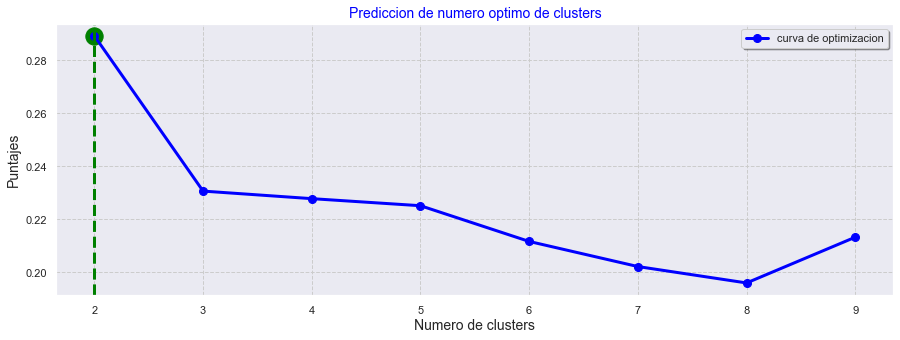

In [457]:
from sklearn.metrics import silhouette_score

versiones_kmeans = [KMeans(n_clusters = k, random_state = randomness).fit(X) for k in range(1, 10)]
puntajes = [silhouette_score(X, model.labels_) for model in versiones_kmeans[1:]]

plt.figure(figsize = (15,5))
plt.plot(range(2, 10), puntajes, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'curva de optimizacion')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Prediccion de numero optimo de clusters', family = 'Arial', fontsize = 14, color = 'blue')
plt.xlabel("Numero de clusters", fontsize = 14)
plt.ylabel("Puntajes", fontsize = 14)

k = np.argmax(puntajes) + 2 
plt.axvline(x = k, linestyle = '--', color = 'green', linewidth = 3)
plt.scatter(k, puntajes[k-2], color = 'green', s=300)
plt.legend(shadow=True)
plt.show()

In [458]:
kmeans = KMeans(n_clusters = 6) 
prediccion = kmeans.fit(X)

In [459]:
correctos = 0
X = np.array(X);
y = np.array(y);
for i in range(len(X)):
    predecido = np.array(X[i].astype(float));
    predecido = predecido.reshape(-1, len(predecido));
    prediccion = kmeans.predict(predecido);
    if prediccion[0] == y[i]:
        correctos += 1
accKN2 = correctos/len(X)
print('Confiabilidad: ', '{0:.1f}'.format(accKN2*100), '%');

Confiabilidad:  16.1 %


***Árboles de Decisión***

In [460]:
model = DecisionTreeClassifier(random_state = randomness)
model.fit(X_train, y_train)
y_predicciones = model.predict(X_test)

In [461]:
accDT1=accuracy_score(y_test, y_predicciones)
print('Confiabilidad :', '{0:.1f}'.format(accDT1*100), '%')

Confiabilidad : 68.9 %


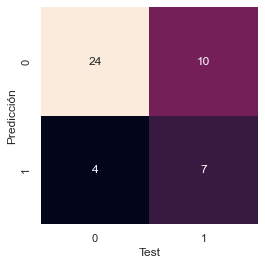

In [462]:
mapa = confusion_matrix(y_test, y_predicciones)
sns.heatmap(mapa.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Test')
plt.ylabel('Predicción');

In [463]:
model = DecisionTreeClassifier(random_state = randomness, max_depth = 5)
model.fit(X_train, y_train)
y_predicciones = model.predict(X_test)
accDT2=accuracy_score(y_test, y_predicciones)
print('Confiabilidad :', '{0:.1f}'.format(accDT2*100), '%')

Confiabilidad : 75.6 %


In [464]:
from sklearn.model_selection import GridSearchCV

In [465]:
para = [{'max_depth' : np.arange(1, 20, 1), 
'max_features' : [None, np.arange(0, 3, 0.1)],  
'min_samples_split' : np.arange(0.1, 3, 0.1)}]

#en cv ingresamos el numero de iteraciones. n_job es el numero de nucleos que utiliza
busquedaMalla = GridSearchCV(cv = 8, scoring = 'accuracy', estimator = DecisionTreeClassifier(), n_jobs = -1, param_grid = para)
busquedaMalla.fit(X_train, y_train)
print(busquedaMalla.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_split=0.2)


In [466]:
y_bestPredicts = busquedaMalla.best_estimator_.predict(X_test)
accDT3=accuracy_score(y_test, y_bestPredicts)
print('Confiabilidad :', '{0:.1f}'.format(accDT3*100), '%')

Confiabilidad : 77.8 %


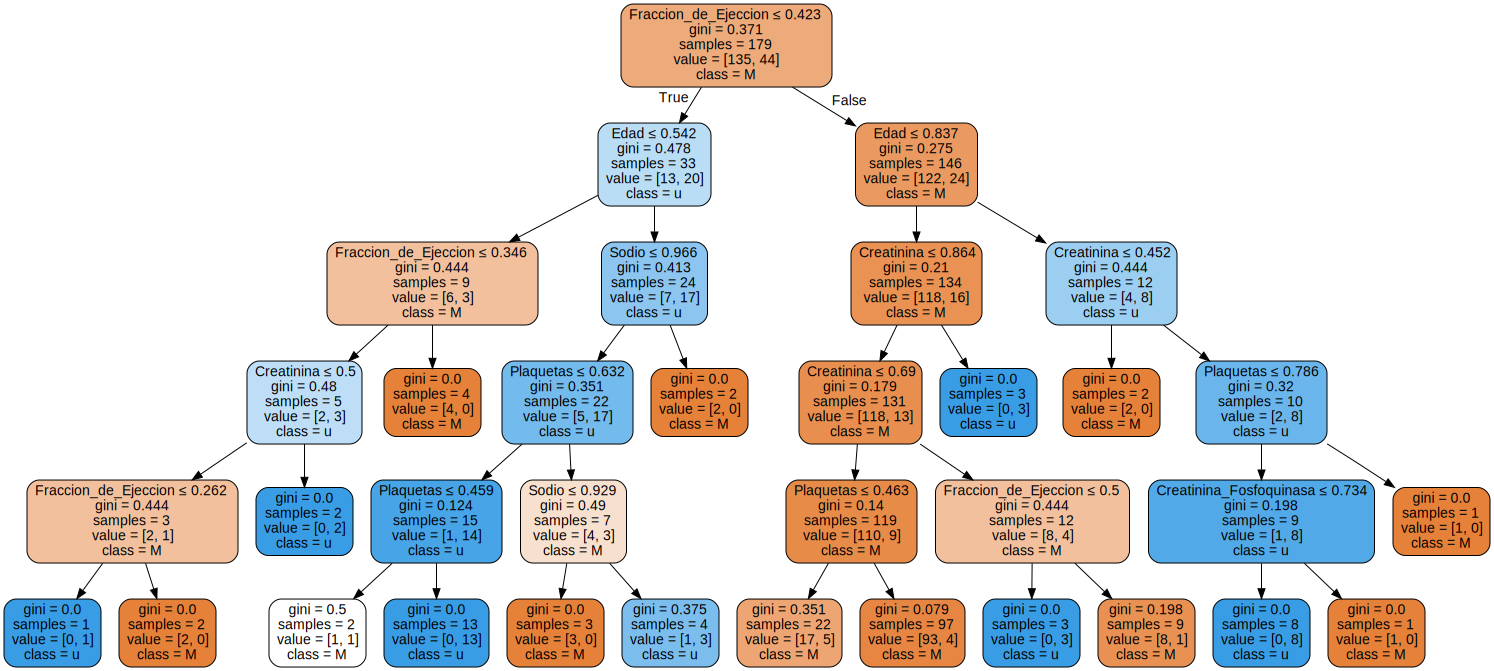

In [478]:
dot_data = tree.export_graphviz(model, out_file=None,feature_names=np.array(list(reduced_newDataSet.drop('Muerte', axis = 1))),class_names='Muerte',filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [479]:
from dtreeviz.trees import *

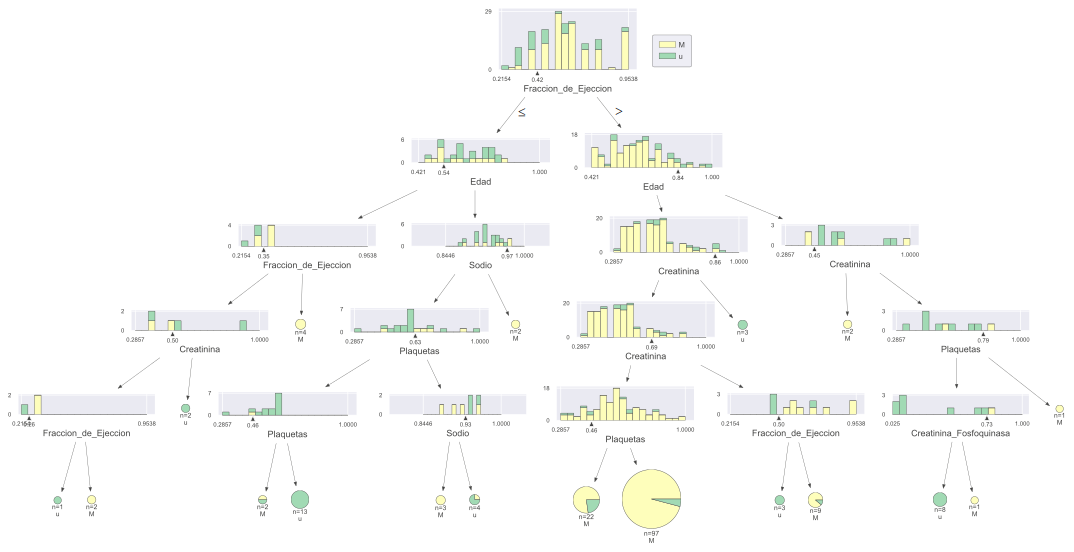

In [480]:
viz = dtreeviz(model, X_train, y_train, feature_names=np.array(list(reduced_newDataSet.drop('Muerte', axis = 1))),class_names='Muerte')
viz

***Random Forest***

In [481]:
forest = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = randomness)
forest.fit(X_train, y_train)
y_predicts = forest.predict(X_test)
accRF1=accuracy_score(y_test, y_predicts)
print('Confiabilidad :', '{0:.1f}'.format(accRF1*100), '%')

Confiabilidad : 71.1 %


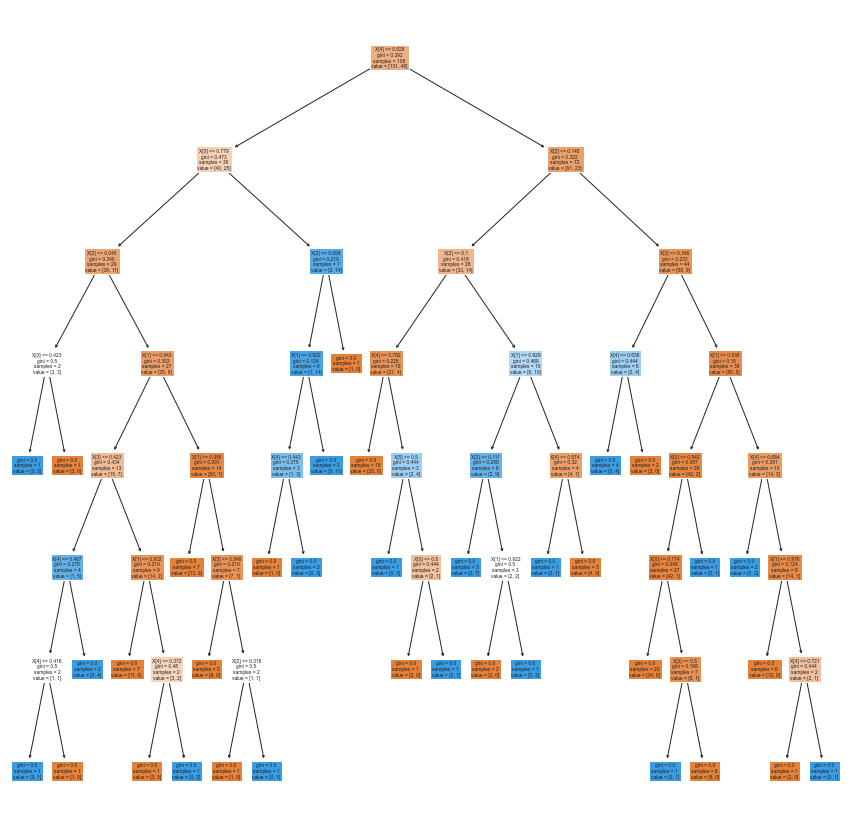

In [482]:
plt.figure(figsize=(15,15))
tree.plot_tree(forest.estimators_[900], filled =True);

In [483]:
print(tree.export_text(forest.estimators_[2]))

|--- feature_3 <= 0.35
|   |--- feature_4 <= 0.83
|   |   |--- feature_1 <= 0.93
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  0.93
|   |   |   |--- feature_0 <= 0.58
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  0.58
|   |   |   |   |--- class: 1.0
|   |--- feature_4 >  0.83
|   |   |--- feature_3 <= 0.28
|   |   |   |--- class: 0.0
|   |   |--- feature_3 >  0.28
|   |   |   |--- class: 1.0
|--- feature_3 >  0.35
|   |--- feature_5 <= 0.60
|   |   |--- feature_1 <= 0.98
|   |   |   |--- feature_3 <= 0.42
|   |   |   |   |--- feature_2 <= 0.54
|   |   |   |   |   |--- feature_2 <= 0.11
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  0.11
|   |   |   |   |   |   |--- feature_0 <= 0.75
|   |   |   |   |   |   |   |--- feature_0 <= 0.67
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- feature_0 >  0.67
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.55
|   |   |   |   |   |   |   |   |   |--- class: 

In [484]:
feature_importances = pd.DataFrame(forest.feature_importances_*100, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
Fraccion_de_Ejeccion,22.608690
Creatinina,19.835401
Edad,18.784345
Plaquetas,15.631998
Creatinina_Fosfoquinasa,13.570755
Sodio,9.568809


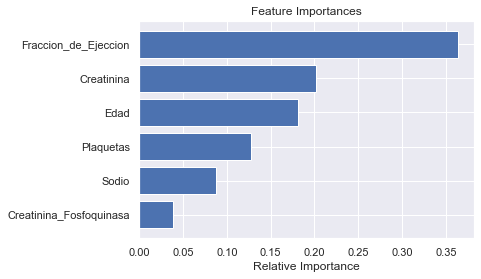

In [485]:
feature_importances = pd.DataFrame(forest.feature_importances_*100, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)
features = list(X_train)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Evaluación de método de modelado con mejor valor de confianza**

In [486]:
print('Regresion Logaritmica')
print('> Confiabilidad: ', '{0:.1f}'.format(accLR1*100), '%')
print('Clustering')
print('> Confiabilidad: ', '{0:.1f}'.format(max(accKN1, accKN2)*100), '%')
print('Arbol de Decisiones')
print('> Confiabilidad: ', '{0:.1f}'.format(max(accDT1, accDT2, accDT3)*100), '%')
print('Random Forest')
print('> Confiabilidad: ', '{0:.1f}'.format(accRF1*100), '%')

Regresion Logaritmica
> Confiabilidad:  66.7 %
Clustering
> Confiabilidad:  60.3 %
Arbol de Decisiones
> Confiabilidad:  77.8 %
Random Forest
> Confiabilidad:  71.1 %


_______________________________________________________________________
_______________________________________________________________________

**PARTE 3: DETERMINACION DE RESULTADOS CLINICOS A SOLICITAR**

*En base a las preguntas realizadas por el cuestionario vigente, la empresa aseguradora puede adentar los siguientes datos del dataset de evaluación de examenes médicos vinculados a infartos:*

    Edad
    Sospecha de generación de niveles altos de CPK (creatinina fosfoquinasa)
    Fuma
    Alta presión arterial
    Sospecha de deficiencias funcionales del corazón
    Sospecha de niveles elevados de plaquetas

*En caso de que cualquiera de estos, a excepción de la edad, sea positivo, deberá realizarse un estudio métido para todos los estudios medicos relevantes. Estos estudios médicos son:*

    Concentración de glóbulos rojos en sangre : (para detectar Anemia)

    Mapeo de presión arterial - en caso de haber declarado niveles elevados de presión arterial: (para detectar Hipertensión)
    
    Concentración de creatinina fosfoquinasa : (para detectar propabilidades de infarto)
    
    Fracción de ejección : (para detectar disfuncion cardíaca)
    
    Concentración de plaquetas : (para detectar enfermedades no vistas)
    
    Nivel de creatinina en sangre : (para detectar disfunción renal)
    
    Nivel de sodio en sangre : (para detectar riesgo de desarrollar hipertensión)

*En caso de no haberse declarado tener casos de hipertensión pero el nivel de sodio en sangre devuelve valores altos, realizar un mapeo de presión arterial*


**- En caso de ser mayor a 80 años > Se rechaza la aprobación de un seguro de vida**

**- En caso de tener hipertensión y altos niveles de sodio en sangre por encima de 147 mg/dL > Se rechaza la aprobación de un seguro de vida**

**- En caso de tener un factor de ejección menor a 50% > Se rechaza la aprobación de un seguro de vida**

**- En caso de tener niveles de creatinina en sangre mayor a 1,1 mg/dL en mujeres y 1,3 mg/dL en hombre > Se rechaza la aprobación de un seguro de vida**


_______________________________________________________________________
_______________________________________________________________________

**PARTE 4: DISEÑO DE MODELO PREDICTIVO**

Las preguntas del cuestionario son las siguientes:
1. Nombres y apellidos
2. Fecha de nacimiento
3. Peso y estatura
4. Deportes que practica
4. ¿Actualmente fuma o ha fumado?
5. ¿Realiza alguna actividad de riesgo?
6. ¿Fue informado alguna vez que presentaba cifras elevadas de tensión arterial o
le fue prescripto algún tratamiento para la hipertensión arterial?
7. ¿Padece o padeció enfermedades cardiovasculares (infarto, angina de pecho,
arritmia, cardiopatía, etc.)?
8. ¿Recibe actualmente o recibió alguna vez tratamiento a causa de diabetes,
colesterol, triglicéridos, hormonales, gota, cáncer o tumores?

Dado que los analisis clinico reflejan que las variables con mayor peso son:

- ejection_fraction
- serum_creatinine
- creatinine_phosphokinase
- serum_sodium
- high_blood_pressure

Por este motivo vamos a diseñar un modelo predictivo para determinar si un potencial asegurado requiere de la realización de análisis clínicos adicionales sobre las variables de mayor peso que determinamos o la póliza le será entregada sin averiguaciones adicionales. 

Para esto utilizaremos un decision tree, dado nuestras variables y las preguntas del cuestionario, las respuestas que nos interesan son 6, 7 y 8. Si las respuestas a esas preguntas son SI entonces se debe de mandar estudios adicionales.

Para esto lo primero que debemos hacer es crear las respuestas de forma que sean representativas con respecto a la poblacion.

Por ende tomaremos la edad en un rango de 40 a 90 años como en el dataset original.
Vamos a generar respuestas unicamente de las preguntas 2 (edad), 4 (fuma), 5(act riesgo) , 6(hipertension) ,7(enfermedades cardiovasculares) ,8(otras enfermedades) 



In [487]:
#creamos las respuestas
import random

respuestasX = []
respuestasY = []

for i in range(1000):
  edad=random.randint(40, 90)
  fuma=random.getrandbits(1)
  act_riesgo=random.getrandbits(1)
  hipertension=random.getrandbits(1)
  enf_cardiovasculares=random.getrandbits(1)
  otras_enferm=random.getrandbits(1)
  
  if enf_cardiovasculares == 1 or hipertension == 1 or edad > 70 :
      resultado = 1 #requiere mas estudios
  else:
      resultado = 0 #se le otorga el seguro
  
  respuesta=[edad,fuma,act_riesgo,hipertension,enf_cardiovasculares,otras_enferm]

  respuestasX.append(respuesta)
  respuestasY.append(resultado)

In [488]:
x_train2 = respuestasX[0:800]
y_train2 = respuestasY[0:800]
x_test2 = respuestasX[800:1000]
y_test2 = respuestasY[800:1000]

from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier(max_depth=3)
model2.fit(X=x_train2, y=y_train2)
DecisionTreeClassifier()

DecisionTreeClassifier()

*____________________________________________________________________________*